# Свойства оценок. Задача 4

__Ильичёв А.С., 693__

In [1]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
%matplotlib inline

#### 1. Сгенерируем выборку $X_1, \dots, X_N$ из стандартного нормального распределения для $N=10^4$.

In [2]:
N = 10 ** 4
ns = np.arange(1, N + 1)
norm_distr = sts.norm(0, 1)
sample = norm_distr.rvs(size=N)

#### 2. Для всех $n \le N$ посчитаем эмпирическую функцию распределения.

In [3]:
ecdf = [ECDF(sample[:i]) for i in ns]

#### 3. Для некоторых $n$ построим графики эмпирической функции распределения.

In [4]:
def make_plot(n): 
    plt.figure(figsize=(10,5))
    x = np.linspace(-4, 4, N)
    plt.step(ecdf[n - 1].x, ecdf[n - 1].y, where='post', alpha=0.7,
             label = 'experimental CDF')
    plt.plot(x, norm_distr.cdf(x), alpha=0.7, label='theoretical CDF')
    plt.scatter(ecdf[n - 1].x, np.zeros(len(ecdf[n - 1].x)),
                alpha=0.2, c='green')
    plt.title(r'$n={}$'.format(n))
    plt.xlabel('x')
    plt.ylabel(r'$F(x)$')
    plt.legend()
    plt.show()

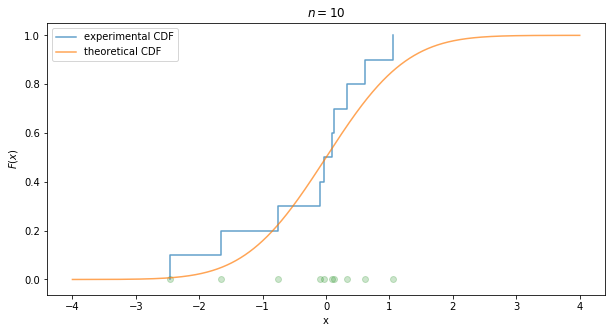

In [5]:
make_plot(10)

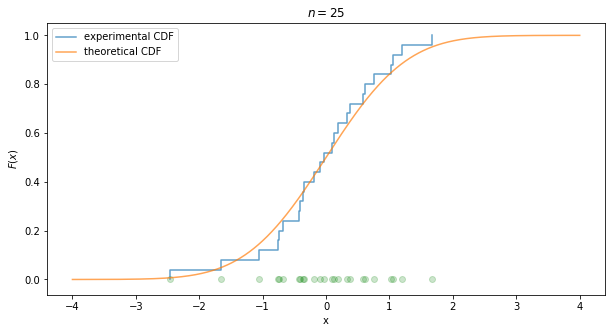

In [6]:
make_plot(25)

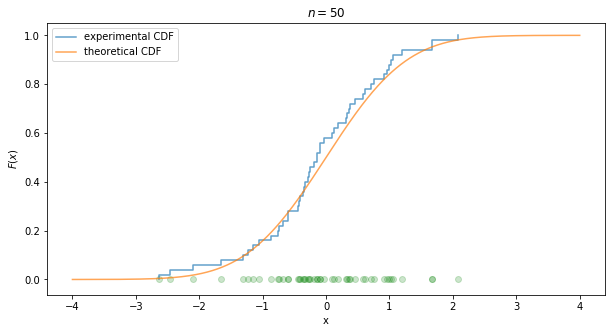

In [7]:
make_plot(50)

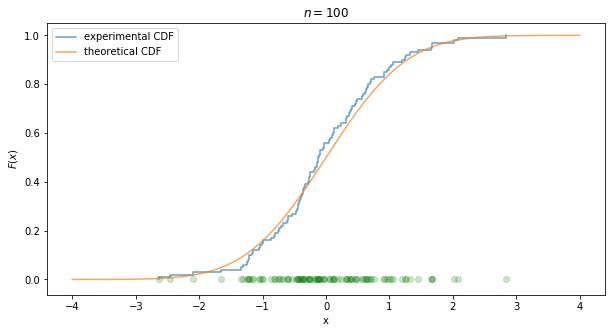

In [8]:
make_plot(100)

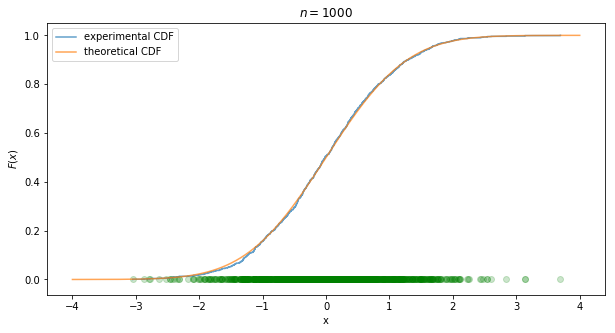

In [9]:
make_plot(1000)

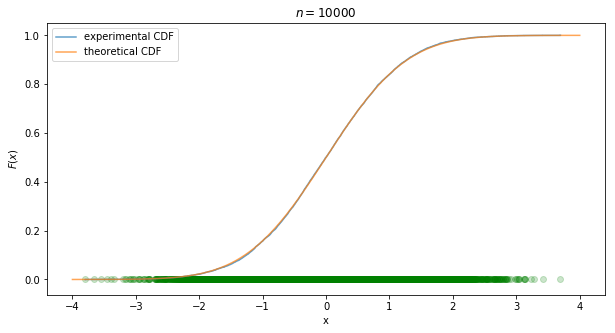

In [10]:
make_plot(N)

#### 4. Для всех $n \le N$ посчитаем значение $D_n = \sup_{x \in\mathbb R}|\hat{F_n}(x) - F(x)|$ и построим графики зависимости статистик $D_n$ и $\sqrt n D_n$ от $n$.

В силу монотонности $F(x)$ достаточно взять для каждой точки $x_i$ выборки $\max(|\hat{F_n}(x_i) - F(x_i)|, \,|\hat{F_n}(x_{i-1}) - F(x_i)|)$ (соответствуют пределам справа и слева), а затем максимум этих значений по всем точкам.

In [11]:
D = []
for n in ns:
    y_left = np.roll(ecdf[n - 1].y, 1) # сдвинем массив точек выборки направо 
    y_left[0] = 0
    D.append(np.max([np.max(np.abs(norm_distr.cdf(ecdf[n - 1].x)
                                   - ecdf[n - 1].y)),
                      np.max(np.abs(norm_distr.cdf(ecdf[n - 1].x)
                                    - y_left))]))


In [12]:
D_sqrt = [D[i] * np.sqrt(i + 1) for i in range(len(D))]

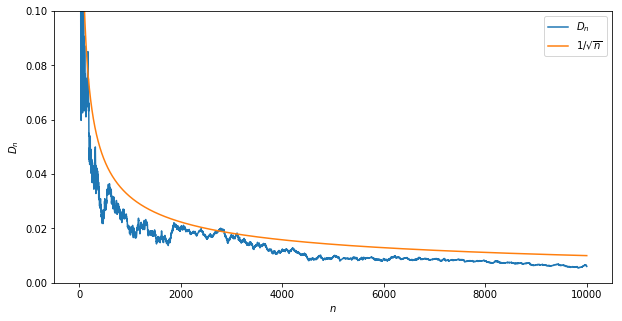

In [13]:
plt.figure(figsize=(10,5))    
plt.plot(ns, D, label = r'$D_n$')
plt.plot(ns, 1/np.sqrt(ns), label = r'$1/\sqrt{n}$')
plt.legend()
plt.xlabel(r'$n$')
plt.ylabel(r'$D_n$')
plt.ylim(0, 0.1) # ограничим масштаб для наглядности
plt.show()    

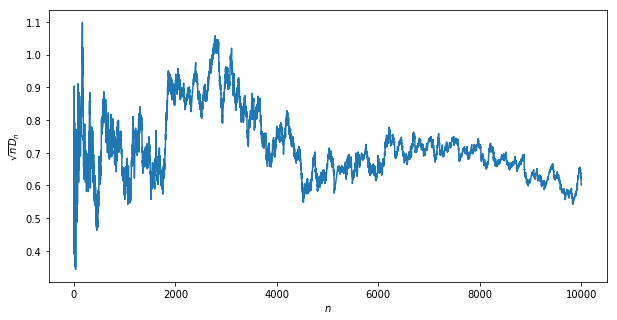

In [14]:
plt.figure(figsize=(10,5))    
plt.plot(ns, D_sqrt)
plt.xlabel(r'$n$')
plt.ylabel(r'$\sqrt{n}  D_n$')
plt.show()    

#### 5. Сделаем выводы.

<br>
Эмпирическая функция распределения, как и ожидается, с ростом $n$ все лучше приближает реальную (стремится к ней почти наверное по теореме Гливенко) и становится визуально неотличимой при больших $n$. Стремление к нулю статистики $D_n$, отраженное на графике, следует из теоремы Гливенко-Кантелли. Статистика $\sqrt n D_n$ по теореме Колмогорова стремится по распределению к случайной величине с распределением Колмогорова (на графике эта статистика колеблется в пределах значений порядка единицы). Из этого, в частности, следует, что скорость сходимости эмпирической функции распределения к теоретической пропорциональна $1/\sqrt n$ (построил эту функцию рядом для наглядности). 